In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
train=pd.read_csv("D:/OneDrive/OneDrive/취업후/파이썬/캐글노하우/Instant Gratification/train.csv")
test=pd.read_csv("D:/OneDrive/OneDrive/취업후/파이썬/캐글노하우/Instant Gratification/test.csv")
submission=pd.read_csv("D:/OneDrive/OneDrive/취업후/파이썬/캐글노하우/Instant Gratification/sample_submission.csv")

In [6]:
print(train.shape)
print(test.shape)

(262144, 258)
(131072, 257)


In [10]:
print(train["target"].value_counts())

target
1    131131
0    131013
Name: count, dtype: int64


<Axes: >

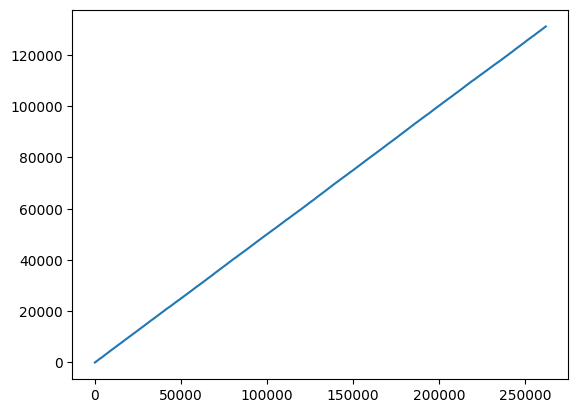

In [13]:
train["target"].cumsum().plot()

In [16]:
train.isnull().sum().sum()

0

In [18]:
train.dtypes.value_counts()

float64    255
int64        2
object       1
Name: count, dtype: int64

In [23]:
train.select_dtypes(include=["object","int"]).head()
# 인트와 오브젝트가 숫자가 적으니 먼저 봄

,id,wheezy-copper-turtle-magic,target
0,707b395ecdcbb4dc2eabea00e4d1b179,99,0
1,5880c03c6582a7b42248668e56b4bdec,52,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,230,1
3,e350f17a357f12a1941f0837afb7eb8d,78,0
4,a8f910ea6075b6376af079055965ff68,497,0


In [26]:
train_columns=[c for c in train.columns if c not in ["id","target"]]
# id와 타겟을 제외하고 칼럼명이 들어있는 리스트를 만듬

In [27]:
train[train_columns].nunique()

muggy-smalt-axolotl-pembus              254322
dorky-peach-sheepdog-ordinal            254588
slimy-seashell-cassowary-goose          254356
snazzy-harlequin-chicken-distraction    254576
frumpy-smalt-mau-ordinal                254330
                                         ...  
jumpy-thistle-discus-sorted             254261
muggy-turquoise-donkey-important        254366
blurry-buff-hyena-entropy               254345
bluesy-chocolate-kudu-fepid             254329
gamy-white-monster-expert               254192
Length: 256, dtype: int64

In [28]:
print(np.where(train[train_columns].nunique()<25000))
# 25000개 이하의 인덱스를 반환

(array([146], dtype=int64),)


In [29]:
print(train_columns[146])
# 인덱스를 다시 넣어서 칼럼명을 확인

wheezy-copper-turtle-magic


In [32]:
print(train["wheezy-copper-turtle-magic"].nunique())

512


In [33]:
print(train["wheezy-copper-turtle-magic"].value_counts().mean())

512.0


In [43]:
train["wheezy-copper-turtle-magic"].value_counts()

wheezy-copper-turtle-magic
51     570
489    556
298    554
135    554
245    553
      ... 
277    476
215    475
108    472
42     471
185    442
Name: count, Length: 512, dtype: int64

In [41]:
print(train["wheezy-copper-turtle-magic"].value_counts().rename_axis("wheezy-copper-turtle-magic").reset_index(name="counts"))

     wheezy-copper-turtle-magic  counts
0                            51     570
1                           489     556
2                           298     554
3                           135     554
4                           245     553
..                          ...     ...
507                         277     476
508                         215     475
509                         108     472
510                          42     471
511                         185     442

[512 rows x 2 columns]


In [44]:
train_columns=[c for c in train_columns if c not in ["id","target","wheezy-copper-turtle-magic"]]

In [ ]:
# ㄴㄴㄴㄴㅇㅇㅇddd